# Script to keep account of core hours used in SLURM

It is possible to output how many CPU hours each job takes up on Rockfish by entering the following 
command into command line:

sacct --starttime 2022-06-01 --
format=User,JobID,Jobname,partition,state,time,start,end,elapsed,MaxRss,MaxVMSize,nnodes,ncpus,n
odelist > hours_used.txt

This command will produce an output file titles hours_used.txt that will look show all processes ran after starting date 2022-06-01.

## Calculate total CPU hours used

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

plt.rcParams.update({'font.size': 10})

file = 'hours_used.txt'

f = open(file,"r")
content = f.read()
lines = content.splitlines()
f.close()

float_list = []

time_list = []
cpu_list = []
start_date = ''

for i in range(1,len(lines)):
    words = lines[i].split()
    if i == 2:
        start_date = words[6]
    if(i % 2 == 0):
        if(words[4] == 'COMPLETED'):
            time_list.append(words[8])
            cpu_list.append(int(words[10]))
                      
cpu_hours = 0
for j in range(len(time_list)):
    i = time_list[j]
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    
    duration = d
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    
    total_hours = hours + (minutes/60) + (seconds/3600)
    cpu_hours += total_hours*cpu_list[j]

print("You have used", cpu_hours, "CPU hours since", start_date[0:10])

You have used 119592.7344444443 CPU hours since 2022-06-02


## Plotting CPU hours used every day since start time

Text(0, 0.5, 'CPU hours used')

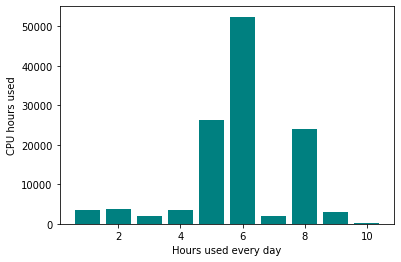

In [2]:
n = 1

f = open(file,"r")
content = f.read()
lines = content.splitlines()
f.close()

float_list = []

time_list = []
cpu_list = []
start_date = ''

orig = 0
days_since = 0

time_list_a = []
cpu_list_a = []
date_list = []

for i in range(1,len(lines)):
    #if(i % 2 == 0):
    words = lines[i].split()
    if(words[4] == 'COMPLETED'):
        date = words[6]
        day = int(date[8:10])
        if(orig == 0):
            orig = day
        days_since = day - orig

        if(days_since < n):
            time_list_a.append(words[8])
            cpu_list_a.append(int(words[10]))
        else:
            date_list.append(date[0:10])
            time_list.append(time_list_a)
            cpu_list.append(cpu_list_a)
            time_list_a = []
            cpu_list_a = []
            time_list_a.append(words[8])
            cpu_list_a.append(float(words[10]))
            orig = 0
                
cpu_hours = []
for k in range(len(time_list)):
    time_list_temp = time_list[k]
    cpu_list_temp = cpu_list[k]
    cpu_hours_temp = 0
    for j in range(len(time_list_temp)):
        i = time_list_temp[j]
        (h, m, s) = i.split(':')
        d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))

        duration = d
        days, seconds = duration.days, duration.seconds
        hours = days * 24 + seconds // 3600
        minutes = (seconds % 3600) // 60
        seconds = seconds % 60

        total_hours = hours + (minutes/60) + (seconds/3600)
        cpu_hours_temp += total_hours*cpu_list_temp[j]
    cpu_hours.append(cpu_hours_temp)
    
plt.bar(np.linspace(1,len(time_list),len(time_list)),cpu_hours,color='teal')
plt.xlabel('Hours used every day')
plt.ylabel('CPU hours used')

## Calendar plot of daily usage

A neatly organized qualitative way to look at daily usage 

<AxesSubplot:>

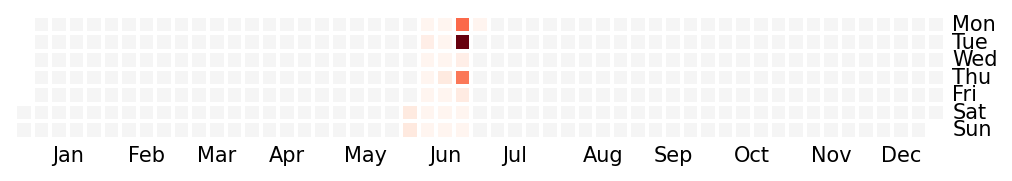

In [3]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap
from matplotlib.pyplot import figure

times = []
for i in range(len(date_list)):
    times.append(np.datetime64(date_list[i]))
dti = pd.to_datetime(times)

events = pd.Series(cpu_hours,dti)

figure(figsize=(8, 8), dpi=150)
calmap.yearplot(events, year=2022)